In [ ]:
!git clone https://github.com/Tanisha221/ori-go.git

Cloning into 'ori-go'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 79 (delta 2), reused 0 (delta 0), pack-reused 68
Receiving objects: 100% (79/79), 4.73 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd


In [ ]:
csv_file_path = '/content/origami.csv'  # Replace with the actual path to your CSV file
origami_links_df = pd.read_csv(csv_file_path)


In [ ]:
train_dir = '/content/mydrive/MyDrive/Train'
val_dir = '/content/ori-go/Test'

In [ ]:
img_size = (512, 512)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')



Found 931 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r= model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
30/30 [==============================] - 201s 6s/step - loss: 1.3060 - accuracy: 0.4984 - val_loss: 1.0003 - val_accuracy: 0.6000
Epoch 2/10
30/30 [==============================] - 69s 2s/step - loss: 0.7942 - accuracy: 0.7089 - val_loss: 0.8316 - val_accuracy: 0.5778
Epoch 3/10
30/30 [==============================] - 68s 2s/step - loss: 0.6245 - accuracy: 0.7508 - val_loss: 0.7476 - val_accuracy: 0.6222
Epoch 4/10
30/30 [==============================] - 68s 2s/step - loss: 0.5406 - accuracy: 0.7830 - val_loss: 0.8672 - val_accuracy: 0.5778
Epoch 5/10
30/30 [==============================] - 69s 2s/step - loss: 0.4728 - accuracy: 0.8077 - val_loss: 0.6361 - val_accuracy: 0.7111
Epoch 6/10
30/30 [==============================] - 69s 2s/step - loss: 0.3296 - accuracy: 0.8808 - val_loss: 1.1279 - val_accuracy: 0.5556
Epoch 7/10
30/30 [==============================] - 68s 2s/step - loss: 0.3128 - accuracy: 0.8776 - val_loss: 0.8459 - val_accuracy: 0.6667
Epoch 8/10
30/30 [=

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 137ms/step - loss: 1.0859 - accuracy: 0.7111
Test accuracy: 0.7111111283302307


In [ ]:
def predict_class_with_link(image_path):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    class_names = ['bat', 'butterfly', 'cat', 'penguin','crane','parrot','cube','pyramid']
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]


    link = origami_links_df.loc[origami_links_df['origami'] == predicted_class, 'link'].values[0]

    return predicted_class, link


1/1 [==============================] - 0s 29ms/step


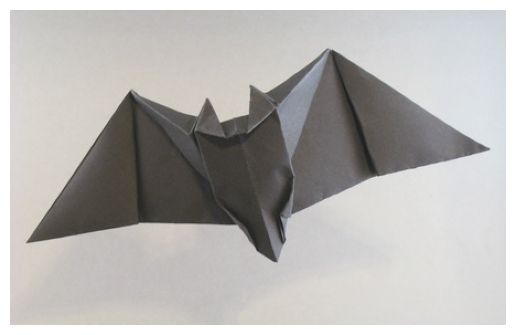

Origami: bat
Link: https://youtube.com/playlist?list=PLefmW1ajxLLDvEXNk3XdvxL4bL3bKp7eU&si=6H5PR6Slt52rdCGI


In [ ]:
def display_image(image_path):
    image = cv2.imread(image_path)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

image_path = '/content/P_Bat_Engel_10.JPG'

predicted_class, link = predict_class_with_link(image_path)
result=display_image(image_path)
print('Origami:', predicted_class)
print('Link:', link)